In [1]:
from sympy import symbols, Function, cos, sin, diff
from sympy.utilities import lambdify
from sympy.vector import CoordSys3D, is_solenoidal, curl, Del
from sympy.functions.elementary.hyperbolic import cosh, sinh

# define symbols and functions
V = Function('V')
Fu = Function('Fu')
Fv = Function('Fv')
C = Function('C')

V_syms = symbols('V, V_u, V_v, V_uu, V_uv, V_vv')
Fu_syms = symbols('Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv')
Fv_syms = symbols('Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv')
C_syms = symbols('C, C_u, C_v, C_uu, C_uv, C_vv')

u, v, a, j, n= symbols('u v a j n')

In [2]:
# helper function to turn functions into symbols
def symbolify(expr, fun, syms):
    expr = expr.subs(fun.diff(v,2), syms[-1])
    expr = expr.subs(fun.diff(u).diff(v), syms[-2])
    expr = expr.subs(fun.diff(u,2), syms[-3])
    expr = expr.subs(fun.diff(v), syms[-4])
    expr = expr.subs(fun.diff(u), syms[-5])
    expr = expr.subs(fun, syms[-6])
    return expr

In [3]:
from sympy.vector import CoordSys3D
BP = CoordSys3D('BP')
u_hat, v_hat, z_hat = BP.i, BP.j, BP.k

h = a/(cosh(v)-cos(u))

def gradient(f):
    return (diff(f, u)*BP.i + diff(f, v)*BP.j)/h

def div(F):
    Fu = F.dot(u_hat)
    Fv = F.dot(v_hat)
    return (diff(Fu*h, u) + diff(Fv*h, v)) / h**2

def curl(F):
    Fu = F.dot(u_hat)
    Fv = F.dot(v_hat)
    Fz = F.dot(z_hat)
    curl_u = u_hat * diff(Fz, v) / h
    curl_v = - v_hat * diff(Fz, u) / h 
    curl_z = z_hat * (diff(h * Fv, u) - diff(h * Fu, v)) / h**2
    return curl_u + curl_v + curl_z

def laplacian(f):
    return div(gradient(f))

Au = Fu(u,v) - n * cosh(v) / a
Av = Fv(u,v)

#eq0_Fu = (1/h)*diff((1/h**2)*(diff(h*Fv(u,v), u) - diff(h * (Fu(u,v) - n*cosh(v)/a), v)),v) + C(u,v)**2*(Fu(u,v) - n*cosh(v)/a)
#eq0_Fu = eq0_Fu.doit().simplify()
eq0_V = (-laplacian(V(u,v)) + C(u,v)**2 * V(u,v) - j).doit()
eq0_F = (curl(curl(Au*u_hat + Av*v_hat).simplify()) + C(u,v)**2 * (Au*u_hat + Av*v_hat)).doit().expand()
eq0_Fu = eq0_F.dot(u_hat)
eq0_Fv = eq0_F.dot(v_hat)
eq0_C = (-laplacian(C(u,v)) + (1 - V(u,v)**2 + Au**2 + Av**2) * C(u,v)).doit()

"""
# ELECTROSTATIC REDUCTION
eq0_V = eq0_V.subs(As(s,t), 0).subs(At(s,t), 0).doit()
eq0_As = eq0_As.subs(As(s,t), 0).subs(At(s,t), 0).doit()
eq0_At = eq0_At.subs(As(s,t), 0).subs(At(s,t), 0).doit()
#eq0_C = eq0_C.subs(As(s,t), cosh(t)/a).subs(At(s,t), 0).doit()
eq0_C = eq0_C.subs(As(s,t), 0).subs(At(s,t), 0).doit()
"""

eq0_V = symbolify(eq0_V, V(u,v), V_syms)
eq0_V = symbolify(eq0_V, C(u,v), C_syms)

eq0_Fu = symbolify(eq0_Fu, Fu(u,v), Fu_syms)
eq0_Fu = symbolify(eq0_Fu, Fv(u,v), Fv_syms)
eq0_Fu = symbolify(eq0_Fu, C(u,v), C_syms)

eq0_Fv = symbolify(eq0_Fv, Fu(u,v), Fu_syms)
eq0_Fv = symbolify(eq0_Fv, Fv(u,v), Fv_syms)
eq0_Fv = symbolify(eq0_Fv, C(u,v), C_syms)

eq0_C = symbolify(eq0_C, V(u,v), V_syms)
eq0_C = symbolify(eq0_C, Fu(u,v), Fu_syms)
eq0_C = symbolify(eq0_C, Fv(u,v), Fv_syms)
eq0_C = symbolify(eq0_C, C(u,v), C_syms)

print('V comp')
display(eq0_V)
print('Fu comp')
display(eq0_Fu)
print('Fv comp')
display(eq0_Fv)
print('C comp')
display(eq0_C)

B = curl(Au*u_hat+Av*v_hat).dot(z_hat).simplify()
B = symbolify(B, Fu(u,v), Fu_syms)
B = symbolify(B, Fv(u,v), Fv_syms)
print('B')
display(B)

V comp


C**2*V - j - (V_uu + V_vv)*(-cos(u) + cosh(v))**2/a**2

Fu comp


C**2*Fu - C**2*n*cosh(v)/a - Fu*cos(u)*cosh(v)/a**2 + Fu*cosh(v)**2/a**2 - Fu_vv*cos(u)**2/a**2 + 2*Fu_vv*cos(u)*cosh(v)/a**2 - Fu_vv*cosh(v)**2/a**2 - Fv_u*cos(u)*sinh(v)/a**2 + Fv_u*sinh(v)*cosh(v)/a**2 + Fv_uv*cos(u)**2/a**2 - 2*Fv_uv*cos(u)*cosh(v)/a**2 + Fv_uv*cosh(v)**2/a**2 + Fv_v*sin(u)*cos(u)/a**2 - Fv_v*sin(u)*cosh(v)/a**2 + n*cos(u)**2*cosh(v)/a**3 - n*cos(u)*cosh(v)**2/a**3

Fv comp


C**2*Fv + Fu_u*cos(u)*sinh(v)/a**2 - Fu_u*sinh(v)*cosh(v)/a**2 + Fu_uv*cos(u)**2/a**2 - 2*Fu_uv*cos(u)*cosh(v)/a**2 + Fu_uv*cosh(v)**2/a**2 - Fu_v*sin(u)*cos(u)/a**2 + Fu_v*sin(u)*cosh(v)/a**2 - Fv*cos(u)**2/a**2 + Fv*cos(u)*cosh(v)/a**2 - Fv_uu*cos(u)**2/a**2 + 2*Fv_uu*cos(u)*cosh(v)/a**2 - Fv_uu*cosh(v)**2/a**2 + n*sin(u)*cos(u)*sinh(v)/a**3 - n*sin(u)*sinh(v)*cosh(v)/a**3

C comp


C*(Fv**2 - V**2 + (Fu - n*cosh(v)/a)**2 + 1) - (C_uu + C_vv)*(-cos(u) + cosh(v))**2/a**2

B


-(Fv*a*sin(u) - (Fu*a - n*cosh(v))*sinh(v) + (cos(u) - cosh(v))*(-Fu_v*a + Fv_u*a + n*sinh(v)))/a**2

In [4]:
args = list(V_syms)
args.extend(Fu_syms)
args.extend(Fv_syms)
args.extend(C_syms)
args.extend([u, v, a, j, n])

print(args)
print(len(args))

eq0_V_lambdified = lambdify(args, eq0_V, 'numpy')
eq0_Fu_lambdified = lambdify(args, eq0_Fu, 'numpy')
eq0_Fv_lambdified = lambdify(args, eq0_Fv, 'numpy')
eq0_C_lambdified = lambdify(args, eq0_C, 'numpy')

B_args = list(Fu_syms)
B_args.extend(Fv_syms)
B_args.extend([u,v,a,n])
print(B_args)
print(len(B_args))
B_lambdified = lambdify(B_args, B)

[V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv, u, v, a, j, n]
29
[Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, u, v, a, n]
16


In [5]:
from numba import njit, jit, typeof, prange
eq0_V_lambdified = njit(eq0_V_lambdified)
eq0_Fu_lambdified = njit(eq0_Fu_lambdified)
eq0_Fv_lambdified = njit(eq0_Fv_lambdified)
eq0_C_lambdified = njit(eq0_C_lambdified)

In [6]:
from matplotlib import pyplot as plt
from time import time
import numpy as np
from scipy.optimize import fsolve

In [7]:
# central difference scheme 
# axis = axis along which derivatives are taken

@njit(cache = True)
def d_du(f, h, n, boundary_left, boundary_right):
    boundary_left = np.reshape(boundary_left, (1, f.shape[1]))
    boundary_right = np.reshape(boundary_right, (1, f.shape[1]))
    f_b = np.concatenate((boundary_left, f, boundary_right))
    f_b = f_b.transpose()
    f_b_shape = f_b.shape
    f_b = f_b.flatten()
    if n == 1:
        padded = (-(1/2)*np.roll(f_b, 1) + (1/2)*np.roll(f_b, -1))/h**n
    elif n == 2:
        padded = (np.roll(f_b, 1) -2*f_b + np.roll(f_b, -1))/h**n
    f_b = np.reshape(padded, f_b_shape)
    f_b = f_b.transpose()
    return f_b[1:-1,:]

@njit(cache = True)
def d_dv(f, h, n, boundary_left, boundary_right):
    return d_du(f.transpose(), h, n, boundary_left, boundary_right).transpose()

8485.441015984346
[15.          7.4958368   4.99260355  3.73960816  2.98671392  2.48387664
  2.12393573  1.85331189  1.64223973  1.47286077  1.33381122  1.2175158
  1.11873064  1.03371057  0.95970957  0.89466847  0.83701297  0.78551889
  0.73922002  0.69734363]
The solution converged.
14.339907884597778


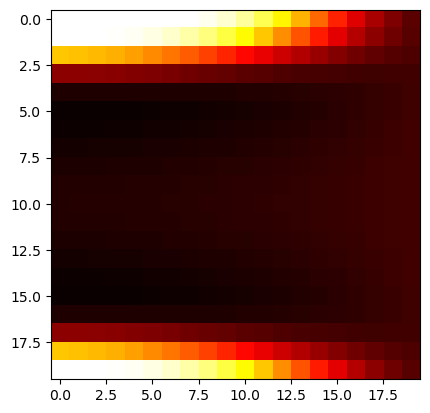

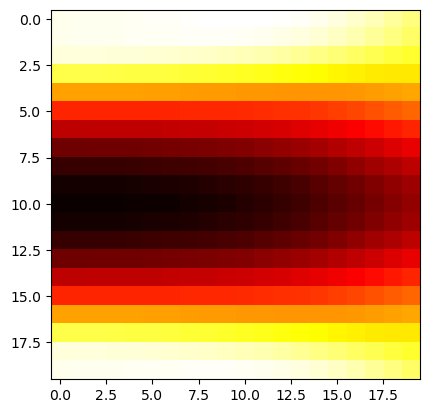

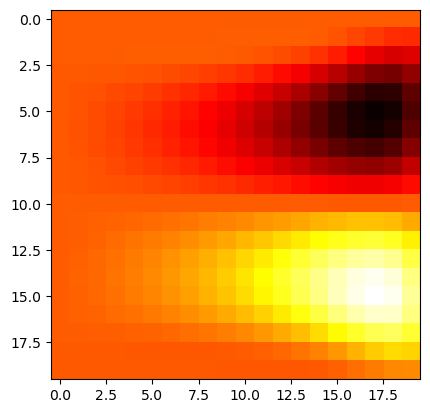

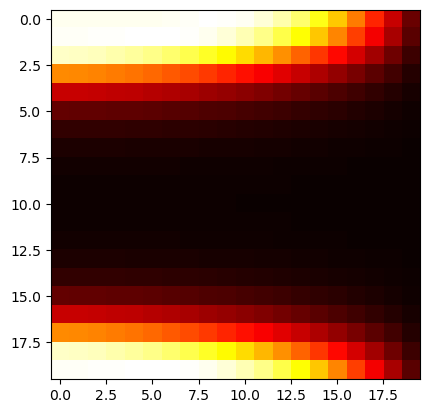

In [8]:
a = 1/2
k = 1
J = -4/k**4
N = 1
nu = 20 # even
nv = 20
#dv = np.log((a+x_min)/(a-x_min))

max_radius = 15
dv = np.arcsinh(a/max_radius)
max_v = nv*dv
#max_v = np.arcsinh(a / 0.1)
Us = np.linspace(0, 2*np.pi, nu + 1)[:-1]
Vs = np.linspace(0, max_v, nv + 1)[1:]
du = Us[1] - Us[0]
dv = Vs[1] - Vs[0]

dAs = np.zeros((nu, nv))
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        h = a / (np.cosh(v) - np.cos(u))
        dAs[i,j] = h**2 * du * dv
print(np.max(dAs))

radii = a/np.sinh(Vs)
print(radii)

@njit(cache = True)
def dfunc_du(func, n):
    boundary_left = np.ascontiguousarray(func[-1,:])
    boundary_right = np.ascontiguousarray(func[0,:])
    return d_du(func, du, n, boundary_left, boundary_right)

@njit(cache = True)
def dV_du(V, n):
    return dfunc_du(V, n)

@njit(cache = True)
def dFu_du(Fu, n):
    return dfunc_du(Fu, n)

@njit(cache = True)
def dFv_du(Fv, n):
    return dfunc_du(Fv, n)

@njit(cache = True)
def dF_du(Fu, Fv, n):
    return dfunc_du(Fu, n), dfunc_du(Fv, n)

@njit(cache = True)
def dC_du(C, n):
    return dfunc_du(C, n)

@njit(cache = True)
def M(u,v):
    M_00 = -np.sin(u)*np.sinh(v) / (np.cosh(v)-np.cos(u))
    M_01 = (1 - np.cos(u)*np.cosh(v)) / (np.cosh(v)-np.cos(u))
    M_10 = - M_01
    M_11 = M_00
    return 

@njit(cache = True)
def BP2cart(Fu, Fv, u, v):
    M_00 = -np.sin(u)*np.sinh(v) / (np.cosh(v)-np.cos(u))
    M_01 = (1 - np.cos(u)*np.cosh(v)) / (np.cosh(v)-np.cos(u))
    M_10 = - M_01
    M_11 = M_00
    return Fu * M_00 + Fv * M_01, Fu * M_10 + Fv * M_11
    #return np.dot(M(u,v), np.array([Fu, Fv]))

@njit(cache = True)
def cart2BP(Fx, Fy, u, v):
    M_00 = -np.sin(u)*np.sinh(v) / (np.cosh(v)-np.cos(u))
    M_01 = (1 - np.cos(u)*np.cosh(v)) / (np.cosh(v)-np.cos(u))
    M_10 = - M_01
    M_11 = M_00
    MT_00, MT_01, MT_10, MT_11 = M_00, M_10, M_01, M_11
    return Fx * MT_00 + Fy * MT_01, Fx * M_10 + Fy * M_11
    #return np.dot(M(u,v).transpose(), np.array([Fx, Fy]))

@njit(cache = True)
def cart2BPinfinity(Fx, Fy, u):
    M_00 = -np.sin(u)
    M_01 = -np.cos(u)
    M_10 = - M_01
    M_11 = M_00
    MT_00, MT_01, MT_10, MT_11 = M_00, M_10, M_01, M_11
    return Fx * MT_00 + Fy * MT_01, Fx * M_10 + Fy * M_11


@njit(cache = True)
def dV_dv(V, n):
    boundary_left = np.ascontiguousarray(V[:,0])
    boundary_left[0] = -1
    boundary_right = np.full(np.shape(V)[0], np.mean(V[:,-1]))
    return d_dv(V, dv, n, boundary_left, boundary_right)

@njit(parallel = True, cache = True)
def dF_dv(Fu, Fv, n = 1):
    xs, ys = BP2cart(Fu[:,-1],  Fv[:,-1], Us, Vs[-1])
    avg_x = np.mean(xs)
    avg_y = np.mean(ys)
    boundary_left_u = np.ascontiguousarray(Fu[:,0])
    boundary_left_u[0] = N / a
    boundary_left_v = np.zeros(nu)
    #boundary_right_u, boundary_right_v =  cart2BP(avg_x, avg_y, Us, Vs[-1]+dv)
    boundary_right_u, boundary_right_v =  cart2BPinfinity(avg_x, avg_y, Us)
    Fu_result = d_dv(Fu, dv, n, boundary_left_u, boundary_right_u)
    Fv_result = d_dv(Fv, dv, n, boundary_left_v, boundary_right_v)
    return Fu_result, Fv_result

@njit(cache = True)
def dC_dv(C, n = 1):
    boundary_left = np.ascontiguousarray(C[:,0])
    boundary_left[0] = np.sqrt(-J)
    boundary_right = np.zeros(np.shape(C)[0])
    return d_dv(C, dv, n, boundary_left, boundary_right)


@njit(parallel = True, cache = True)
def f(V_Fu_Fv_C):
    #atime = time()
    V = np.reshape(V_Fu_Fv_C[0:(nu*nv)], (nu,nv))
    Fu = np.reshape(V_Fu_Fv_C[(nu*nv):2*(nu*nv)], (nu,nv))
    Fv = np.reshape(V_Fu_Fv_C[2*(nu*nv):3*(nu*nv)], (nu,nv))
    C = np.reshape(V_Fu_Fv_C[3*(nu*nv):],(nu,nv))
    eq0_V = np.zeros((nu, nv))
    eq0_Fu = np.zeros((nu, nv))
    eq0_Fv = np.zeros((nu, nv))
    eq0_C = np.zeros((nu, nv))
    V_u = dV_du(V, n = 1)
    V_v = dV_dv(V, n = 1)
    V_uu = dV_du(V, n = 2)
    V_uv = dV_du(V_v, n = 1)
    V_vv = dV_dv(V, n = 2)
    Fu_u, Fv_u = dF_du(Fu, Fv, n = 1)
    Fu_v, Fv_v = dF_dv(Fu, Fv, n = 1)
    Fu_uu, Fv_uu = dF_du(Fu, Fv, n = 2)
    Fu_uv, Fv_uv = dF_du(Fu_v, Fv_v, n = 1)
    Fu_vv, Fv_vv = dF_dv(Fu, Fv, n = 2)
    C_u = dC_du(C, n = 1)
    C_v = dC_dv(C, n = 1)
    C_uu = dC_du(C, n = 2)
    C_uv = dC_du(C_v, n = 1)
    C_vv = dC_dv(C, n = 2)
    #btime = time()
    # define arguments for the lambdified expression from sympy and fill the result array
    args = np.zeros(29)
    for i in prange(nu):
        u = Us[i]
        for j in prange(nv):
            v = Vs[j]
            args = (V[i,j], V_u[i,j], V_v[i,j], V_uu[i,j], V_uv[i,j], V_vv[i,j], Fu[i,j], Fu_u[i,j], Fu_v[i,j], Fu_uu[i,j], Fu_uv[i,j], Fu_vv[i,j], Fv[i,j], Fv_u[i,j], Fv_v[i,j], Fv_uu[i,j], Fv_uv[i,j], Fv_vv[i,j], C[i,j], C_u[i,j], C_v[i,j], C_uu[i,j], C_uv[i,j], C_vv[i,j], u, v, a, J, N)
            eq0_V[i,j] = eq0_V_lambdified(*args)
            eq0_Fu[i,j] = eq0_Fu_lambdified(*args)
            eq0_Fv[i,j] = eq0_Fv_lambdified(*args)
            eq0_C[i,j] = eq0_C_lambdified(*args)
    result = np.append(eq0_V.flatten(), eq0_Fu.flatten())
    result = np.append(result, eq0_Fv.flatten())
    result = np.append(result, eq0_C.flatten())
    #ctime = time()
    #print('b-a', btime - atime)
    #print('c-b', ctime - btime)
    #print(atime, btime, ctime)
    #print('ab', btime - atime)
    #print('bc', ctime - btime)
    return result


@njit(cache = True)
def parta(V_Fu_Fv_C):
    V = np.reshape(V_Fu_Fv_C[0:(nu*nv)], (nu,nv))
    Fu = np.reshape(V_Fu_Fv_C[(nu*nv):2*(nu*nv)], (nu,nv))
    Fv = np.reshape(V_Fu_Fv_C[2*(nu*nv):3*(nu*nv)], (nu,nv))
    C = np.reshape(V_Fu_Fv_C[3*(nu*nv):],(nu,nv))
    V_u = dV_du(V, n = 1)
    V_v = dV_dv(V, n = 1)
    V_uu = dV_du(V, n = 2)
    V_uv = dV_du(V_v, n = 1)
    V_vv = dV_dv(V, n = 2)
    #a2 = time()
    Fu_u, Fv_u = dF_du(Fu, Fv, n = 1)
    #a3 = time()
    Fu_v, Fv_v = dF_dv(Fu, Fv, n = 1)
    #a4 = time()
    Fu_uu, Fv_uu = dF_du(Fu, Fv, n = 2)
    #a5 = time()
    Fu_uv, Fv_uv = dF_du(Fu_v, Fv_v, n = 1)
    #a6 = time()
    Fu_vv, Fv_vv = dF_dv(Fu, Fv, n = 2)
    #a7 = time()
    C_u = dC_du(C, n = 1)
    C_v = dC_dv(C, n = 1)
    C_uu = dC_du(C, n = 2)
    C_uv = dC_du(C_v, n = 1)
    C_vv = dC_dv(C, n = 2)
    #a4 = time()
    #print('2', a3-a2) 
    #print('3', a4-a3) 
    #print('4', a5-a4) 
    #print('5', a6-a5) 
    #print('6', a7 - a6)
    return V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv

@njit(parallel = True, cache = True)
def partb(derivatives):
    V, V_u, V_v, V_uu, V_uv, V_vv, Fu, Fu_u, Fu_v, Fu_uu, Fu_uv, Fu_vv, Fv, Fv_u, Fv_v, Fv_uu, Fv_uv, Fv_vv, C, C_u, C_v, C_uu, C_uv, C_vv = derivatives
    eq0_V = np.zeros((nu, nv))
    eq0_Fu = np.zeros((nu, nv))
    eq0_Fv = np.zeros((nu, nv))
    eq0_C = np.zeros((nu, nv))
    args = np.zeros(29)
    for i in prange(nu):
        u = Us[i]
        for j in prange(nv):
            v = Vs[j]
            args = (V[i,j], V_u[i,j], V_v[i,j], V_uu[i,j], V_uv[i,j], V_vv[i,j], Fu[i,j], Fu_u[i,j], Fu_v[i,j], Fu_uu[i,j], Fu_uv[i,j], Fu_vv[i,j], Fv[i,j], Fv_u[i,j], Fv_v[i,j], Fv_uu[i,j], Fv_uv[i,j], Fv_vv[i,j], C[i,j], C_u[i,j], C_v[i,j], C_uu[i,j], C_uv[i,j], C_vv[i,j], u, v, a, J, N)
            eq0_V[i,j] = eq0_V_lambdified(*args)
            eq0_Fu[i,j] = eq0_Fu_lambdified(*args)
            eq0_Fv[i,j] = eq0_Fv_lambdified(*args)
            eq0_C[i,j] = eq0_C_lambdified(*args)
    result = np.append(eq0_V.flatten(), eq0_Fu.flatten())
    result = np.append(result, eq0_Fv.flatten())
    result = np.append(result, eq0_C.flatten())
    #ctime = time()
    #print('b-a', btime - atime)
    #print('c-b', ctime - btime)
    #print(atime, btime, ctime)
    #print('ab', btime - atime)
    #print('bc', ctime - btime)
    return result

def g(V_Fu_Fv_C):
    timea = time()
    derivatives = parta(V_Fu_Fv_C)
    timeb = time()
    result = partb(derivatives)
    timec = time()
    print('part a', timeb-timea)
    print('part b', timec-timeb)
    return result
"""
def g(V_Fu_Fv_C):
    start = time()
    result = f(V_Fu_Fv_C)
    end = time()
    print(start, end)
    return result
"""

# solve nonlinear problem
x0 = np.zeros(4*nu*nv, dtype = float)
x0[0:(nu*nv)] = -1
Fu0 = np.zeros((nu,nv))
for j, v in enumerate(Vs):
    Fu0[:, j] = N * np.cosh(v) / a
x0[(nu*nv):2*(nu*nv)] = Fu0.flatten()
x0[3*(nu*nv):] = np.sqrt(-J)
start = time()
solution, infodict, ier, mesg = fsolve(f, x0, full_output = True)
end = time()
print(mesg)
print(end-start)

V = np.reshape(solution[0:(nu*nv)], (nu,nv))
Fu = np.reshape(solution[(nu*nv):2*(nu*nv)], (nu,nv))
Fv = np.reshape(solution[2*(nu*nv):3*(nu*nv)], (nu,nv))
C = np.reshape(solution[3*(nu*nv):], (nu,nv))

plt.imshow(V, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(Fu, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(Fv, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(C, cmap='hot', interpolation='nearest')
plt.show()

0.13392037750990937
0.007074420411741758


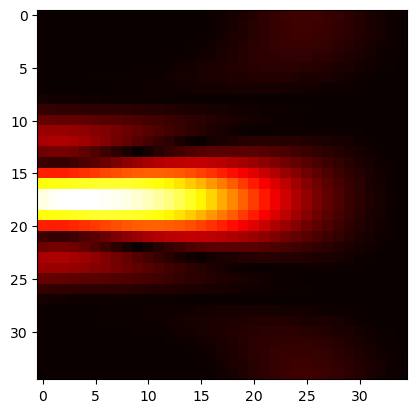

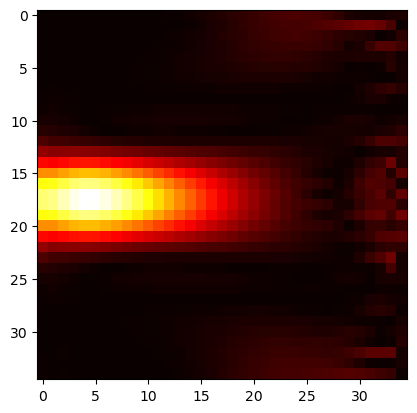

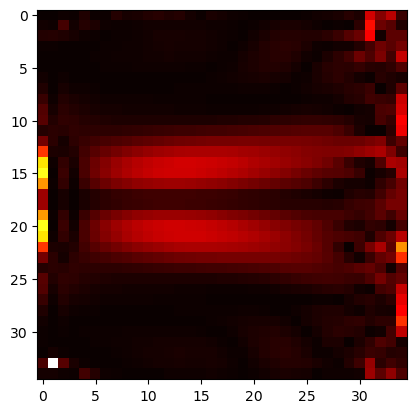

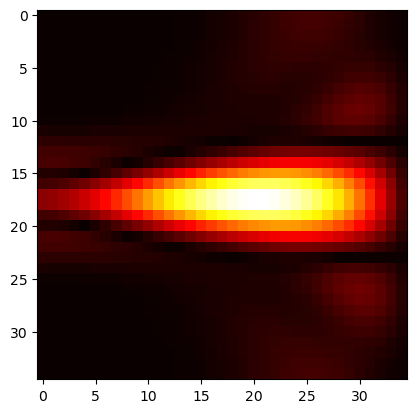

In [11]:
error = infodict['fvec']
print(np.max(np.abs(error)))
print(np.mean(np.abs(error)))
V_error = np.reshape(error[0:(nu*nv)], (nu,nv))
Fu_error = np.reshape(error[(nu*nv):2*(nu*nv)], (nu,nv))
Fv_error = np.reshape(error[2*(nu*nv):3*(nu*nv)], (nu,nv))
C_error = np.reshape(error[3*(nu*nv):], (nu,nv))
plt.imshow(np.abs(V_error), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(np.abs(Fu_error), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(np.abs(Fv_error), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(np.abs(C_error), cmap='hot', interpolation='nearest')
plt.show()


0


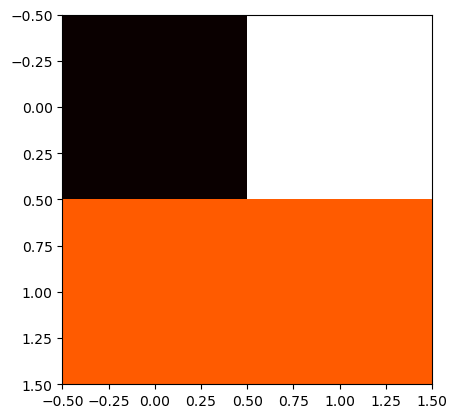

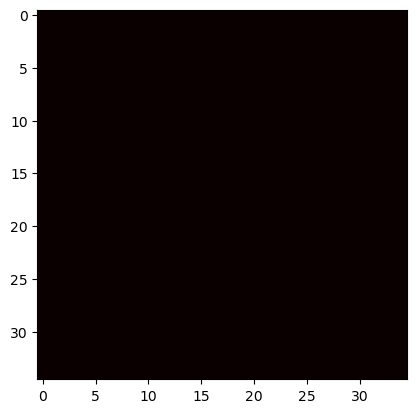

In [10]:
print(np.sum(C<0))
test = np.zeros((2,2))
test[0,0] = -1
test[0,1] = 1
plt.imshow(test, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(C<0, cmap='hot', interpolation='nearest')
plt.show()


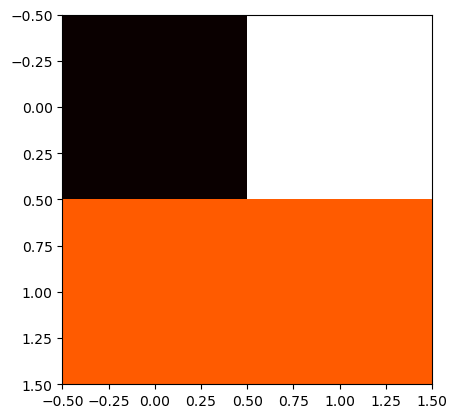

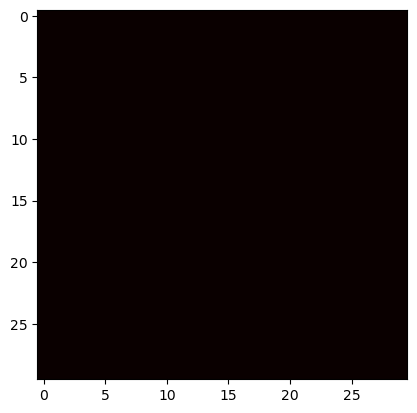

In [11]:
 np.zeros((2,2))
test[0,0] = -1
test[0,1] = 1
plt.imshow(test, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(C<0, cmap='hot', interpolation='nearest')
plt.show()


V


200it [00:20,  9.93it/s]


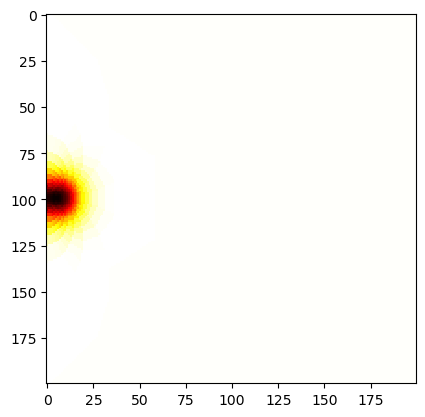

F_u


200it [00:20,  9.96it/s]


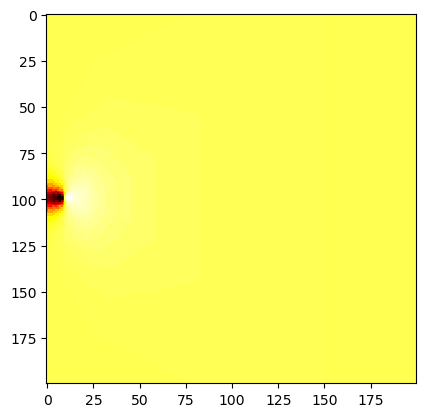

F_v


200it [00:20,  9.95it/s]


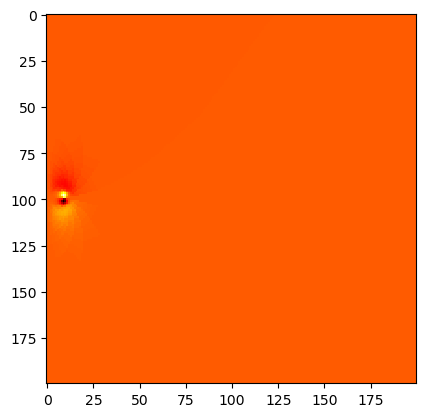

C


200it [00:19, 10.06it/s]


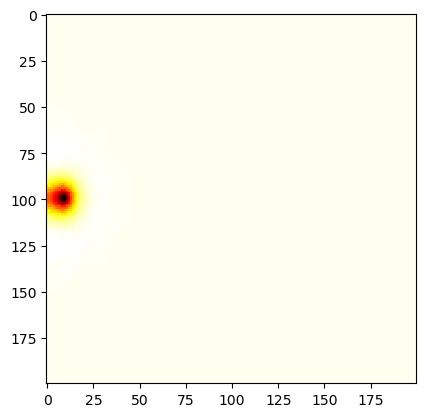

In [12]:
from tqdm import tqdm
V_points = []
Fu_points = []
Fv_points = []
C_points = []
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        h = a / (np.cosh(v) - np.cos(u))
        x = h * np.sinh(v)
        y = h * np.sin(u)
        V_points.append((x, y, V[i,j]))
        Fu_points.append((x, y, Fu[i,j]))
        Fv_points.append((x, y, Fv[i,j]))
        C_points.append((x, y, C[i,j]))

        
def plot(field):
    field_points = []
    for i, u in enumerate(Us):
        for j, v in enumerate(Vs):
            h = a / (np.cosh(v) - np.cos(u))
            x = h * np.sinh(v)
            y = h * np.sin(u)
            field_points.append((x, y, field[i,j]))
    
    min_x = min(p[0] for p in field_points)
    max_x = max(p[0] for p in field_points)
    min_y = min(p[1] for p in field_points)
    max_y = max(p[1] for p in field_points)
    min_z = min(p[2] for p in field_points)
    max_z = max(p[2] for p in field_points)
    nx = 200
    ny = 200
    X = np.linspace(min_x, max_x, nx)
    Y = np.linspace(min_y, max_y, ny)
    Z = np.zeros((ny, nx))
    def dist(x1, y1, x2, y2):
        return np.sqrt((x1-x2)**2 + (y1-y2)**2)
    for i, x in tqdm(enumerate(X)):
        for j, y in enumerate(Y):
            closest_dist = np.sqrt((max_x - min_x)**2 + (max_y - min_y)**2)
            for p in field_points:
                px, py, pz = p
                d = dist(x, y, px, py)
                if d < closest_dist:
                    Z[j, i] = pz
                    closest_dist = d
    plt.imshow(Z, cmap='hot', interpolation='nearest')
    plt.show()

print('V')
plot(V)
print('F_u')
plot(Fu)
print('F_v')
plot(Fv)
print('C')
plot(C)

200it [00:43,  4.60it/s]


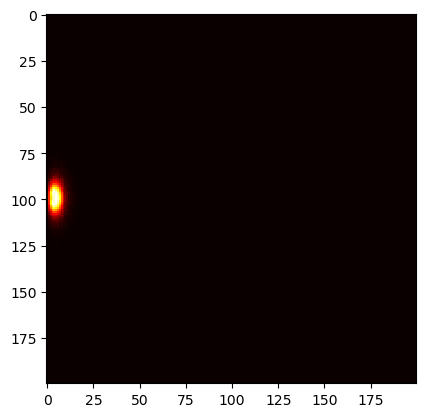

In [13]:
Fu_u, Fv_u = dF_du(Fu, Fv, n = 1)
Fu_v, Fv_v = dF_dv(Fu, Fv, n = 1)
Fu_uu, Fv_uu = dF_du(Fu, Fv, n = 2)
Fu_uv, Fv_uv = dF_du(Fu_v, Fv_v, n = 1)
Fu_vv, Fv_vv = dF_dv(Fu, Fv, n = 2)
B = np.zeros((nu,nv))
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        args = [Fu[i,j], Fu_u[i,j], Fu_v[i,j], Fu_uu[i,j], Fu_uv[i,j], Fu_vv[i,j]]
        args.extend([Fv[i,j], Fv_u[i,j], Fv_v[i,j], Fv_uu[i,j], Fv_uv[i,j], Fv_vv[i,j]])
        args.extend([u, v, a, N])
        B[i,j] = B_lambdified(*args)
plot(B)

50it [00:02, 17.61it/s]
50it [00:00, 52586.56it/s]


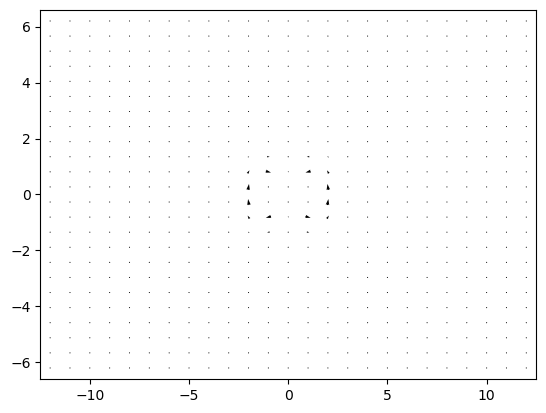

In [14]:
def plot_vector(field_u, field_v):
    field_points = []
    for i, u in enumerate(Us):
        for j, v in enumerate(Vs):
            h = a / (np.cosh(v) - np.cos(u))
            x = h * np.sinh(v)
            y = h * np.sin(u)
            fpx, fpy = BP2cart(field_u[i,j], field_v[i,j], u, v)
            field_points.append((x,y,fpx,fpy))    
    min_x = min(p[0] for p in field_points)
    max_x = max(p[0] for p in field_points)
    min_y = min(p[1] for p in field_points)
    max_y = max(p[1] for p in field_points)
    #min_z = min(p[2] for p in field_points)
    #max_z = max(p[2] for p in field_points)
    nx = 50
    ny = 50
    XX = np.linspace(max_x/nx, max_x, nx)
    YY = np.linspace(min_y, max_y, ny)
    UU = np.zeros((nx, ny))
    VV = np.zeros((nx, ny))
    def dist(x1, y1, x2, y2):
        return np.sqrt((x1-x2)**2 + (y1-y2)**2)
    for i, x in tqdm(enumerate(XX)):
        for j, y in enumerate(YY):
            closest_dist = np.sqrt((max_x - min_x)**2 + (max_y - min_y)**2)
            for p in field_points:
                px, py, fpx, fpy = p
                d = dist(x, y, px, py)
                if d < closest_dist:
                    UU[i,j] = fpx
                    VV[i,j] = fpy
                    closest_dist = d
    XXX = []
    YYY = []
    UUU = []
    VVV = []
    for j, y in enumerate(YY):
        XXX.append(0)
        YYY.append(y)
        UUU.append(0)
        VVV.append(VV[0,j])
    for i, x in tqdm(enumerate(XX)):
        for j, y in enumerate(YY):
            XXX.append(x)
            YYY.append(y)
            UUU.append(UU[i,j])
            VVV.append(VV[i,j])
            XXX.append(-x)
            YYY.append(y)
            UUU.append(-UU[i,j])
            VVV.append(VV[i,j])
    fig1, ax1 = plt.subplots()
    Q = ax1.quiver(XXX, YYY, UUU, VVV, units='width', angles='xy', scale_units='xy', scale=5, pivot = 'middle')
    plt.xlim(-max_x/4, max_x/4)
    plt.ylim(min_y/2, max_y/2)
    plt.savefig('test.pdf')
    plt.show()

current_u = np.zeros((nu, nv))
current_v = np.zeros((nu, nv))
norm = np.zeros((nu,nv))
for i, u in enumerate(Us):
    for j, v in enumerate(Vs):
        current_u[i,j] = -(Fu[i,j] - N * np.cosh(v)/a) * C[i,j]**2
        current_v[i,j] = -Fv[i,j] * C[i,j]**2
        norm[i,j] = np.sqrt(current_u[i,j]**2 + current_v[i,j]**2)
#plot(norm)
plot_vector(current_u, current_v)